## Data Preprocessing ##

In [1]:
import csv

# def create_csv_from_textfile(input_textfile, output_csvfile):
#     with open(input_textfile, 'r', encoding='utf-8') as infile, open(output_csvfile, 'w', newline='', encoding='utf-8') as outfile:
#         writer = csv.writer(outfile)
#         # Write the header
#         writer.writerow(['image_name', 'labels'])
        
#         # Iterate through each line in the input text file
#         for line in infile:
#             # Split the line by tab
#             image_name, latex_expression = line.strip().split("\t")
#             # print("length of x is : ",len(x))
#             image_name = image_name + ".bmp"
#             # Write the row to the CSV
#             writer.writerow([image_name, latex_expression])

# # Example usage
# input_textfile = '/kaggle/input/cnn-dataset/train_caption.txt'  # Path to your input text file
# output_csvfile = '/kaggle/working/train.csv'  # Path to your output CSV file

# create_csv_from_textfile(input_textfile, output_csvfile)


In [2]:
# %pip install opencv-python
# %pip install pandas
# %pip install matplotlib

In [2]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, AvgPool2D, Reshape, Bidirectional, Dense,Lambda,Activation,BatchNormalization,Dropout,Flatten,GRU
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [4]:
# import os
# import glob
# import numpy as np
# from sklearn.model_selection import train_test_split
# from shutil import copy2

# # Input the path to your folder containing the images
# folder_path = '/kaggle/input/cnn-dataset/train'

# # Get the list of all images in the folder
# images = glob.glob(os.path.join(folder_path, '*.bmp'))

# # Split the images into training and validation sets
# train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

# output_folder_path = '/kaggle/working/'
# # Create the training and validation folders
# train_folder = os.path.join(output_folder_path, 'train')
# val_folder = os.path.join(output_folder_path, 'validation')

# # Create the training and validation folders if they don't exist
# if not os.path.exists(train_folder):
#     os.makedirs(train_folder)
# if not os.path.exists(val_folder):
#     os.makedirs(val_folder)

# # Move the images to their respective folders
# for img in train_images:
#     img_name = os.path.basename(img)
#     copy2(img, os.path.join(train_folder, img_name))
# for img in val_images:
#     img_name = os.path.basename(img)
#     copy2(img, os.path.join(val_folder, img_name))

# print("Training data:", len(train_images))
# print("Validation data:", len(val_images))

mapping of image name with latex expression during splitting

In [5]:
# import csv

# img_latex_mapping = '/kaggle/working/train.csv'
# # Read the CSV file
# with open(img_latex_mapping, 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     image_latex_map = {row[0]: row[1] for row in reader}

# # Create a list to store the mapped data
# mapped_data = []
# img_folder = '/kaggle/working/validation'

# # Iterate through the folder and map the image names to their corresponding LaTeX expressions
# for filename in os.listdir(img_folder):
#     if filename.endswith('.bmp'):  # Assuming your images are in PNG format
#         image_name = os.path.splitext(filename+".bmp")[0]
#         latex_expression = image_latex_map.get(image_name,)
#         mapped_data.append([image_name, latex_expression])

# output_mapped_valid_csv = '/kaggle/working/mapped_valid_data.csv'
# # Write the mapped data to a new CSV file
# with open(output_mapped_valid_csv, 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Image Name', 'LaTeX Expression'])  # Write the header
#     writer.writerows(mapped_data)

In [4]:
train = pd.read_csv("./updated_train.csv" , quotechar='"')
valid = pd.read_csv("./updated_2014.csv", quotechar='"')

In [5]:
# with open("cnn_dataset/train_caption.txt", "r") as file1:
#     with open("cnn_dataset/train.csv", "w") as file2:
#         file2.write("image_name"+","+"labels\n")
#         lines = file1.readlines()
#         for f in lines:
#             line = f.split("\t")
#             if(line == 1):
#                 print("something went wrong")
#             string = line[0]+ ".bmp" +  "," + line[1]
#             file2.write(string)


In [6]:
# input_file = 'C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\cnn_dataset\\train.csv'
# output_file = 'cnn_dataset/updated_train.csv'

# with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
#     for line in infile:
#         # Split the line at the first comma
#         parts = line.split(',', 1)
#         if len(parts) == 2:
#             # Add quotes around the second field
#             parts[1] = f'"{parts[1].strip()}"'
#             # Write the modified line to the new file
#             outfile.write(','.join(parts) + '\n')


In [5]:
train.loc[0, "image_name"]

'formulaire004-equation047.bmp'

##  Resizing image into 32x32

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Set NumPy to print the full array without truncation
np.set_printoptions(threshold=np.inf)


def resize_image(image_path, size=(128, 128)):
    """
    Resize the input image to the specified size without padding.

    Parameters:
    - image_path: Path to the input image.
    - output_path: Path to save the resized image.
    - size: Final desired size of the output image (default is (32, 32)).
    """
    # Load the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Error: Could not load image from path: {image_path}")
        return

    # Resize the image without padding
    resized_image = cv2.resize(image, size, interpolation=cv2.INTER_AREA)

    
    return cv2.rotate(resized_image, cv2.ROTATE_90_CLOCKWISE)
    # return resized_image

# Example usage
# image_path = 'C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\cnn_dataset\\splitted_train\\3_em_11.bmp'  # Replace with your actual image path
# output_path = 'C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\cnn_dataset\\resized_image.bmp'        # Path where the resized image will be saved


# Call the function
# img = resize_image(image_path)
# plt.axis("off")
# plt.imshow(img, cmap='gray')

In [7]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([128, 128])*255 # blank white image
    
    # crop
    if w > 128:
        img = img[:, :128]
        
    if h > 128:
        img = img[:128, :]
    
    
    final_img[:h, :w] = img
    return cv2.rotate(final_img, cv2.ROTATE_90_CLOCKWISE)

In [8]:
train_size = len(train)
valid_size = len(valid)
train_size,valid_size

(8835, 985)

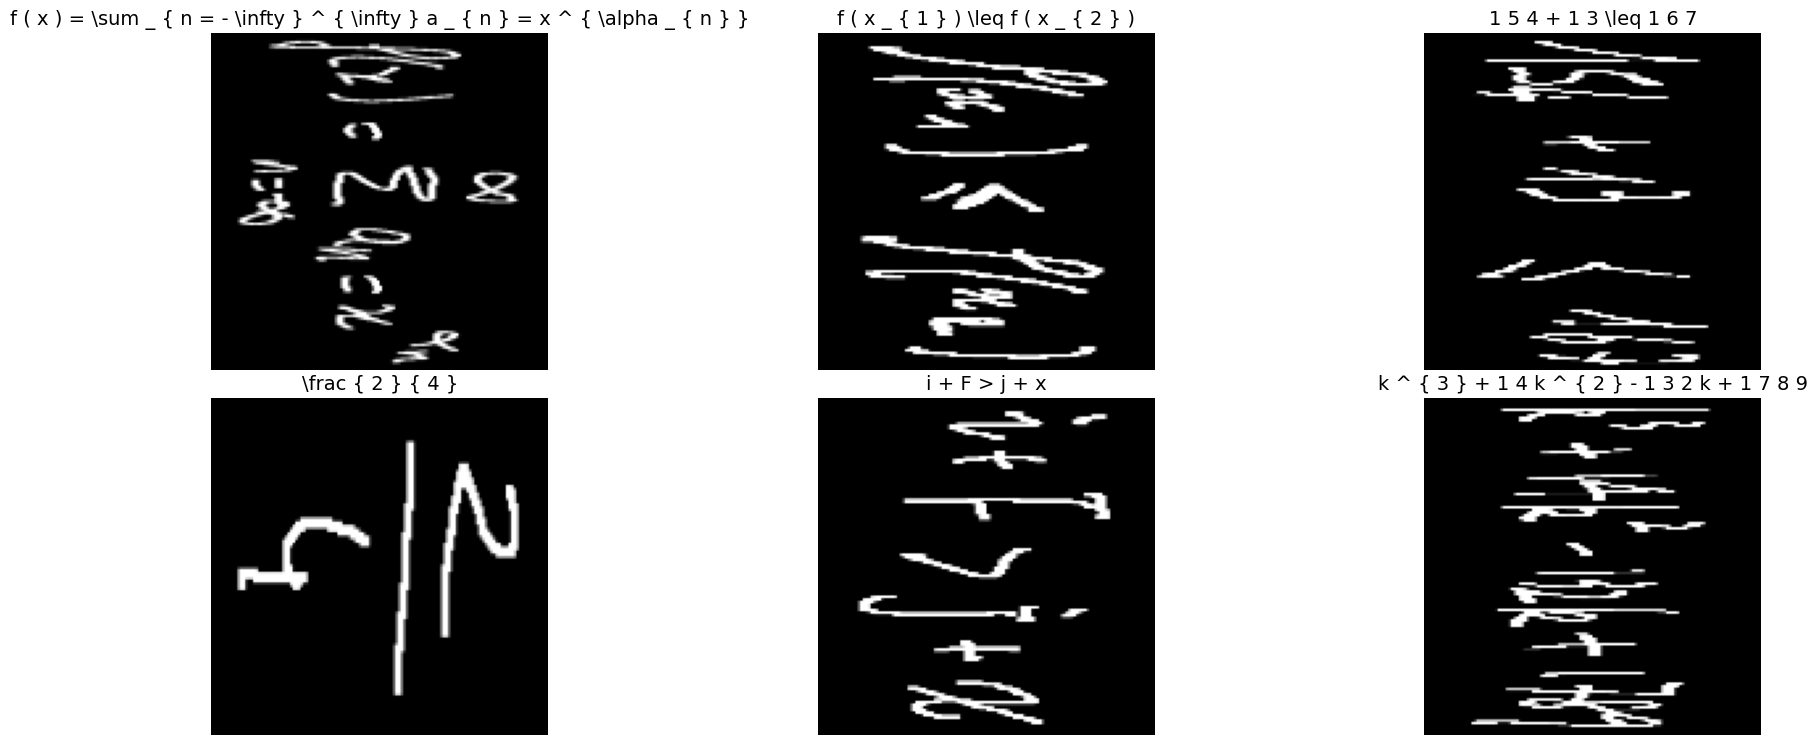

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = './train/'+train.loc[i, 'image_name']
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = resize_image(img_dir)
    plt.imshow(image, cmap = 'gray')
    plt.title(train.loc[i, 'labels'], fontsize=14)
    plt.axis('off')

plt.subplots_adjust(wspace=0.8, hspace= -0.1)

In [10]:
train_x = []

for i in range(train_size):
    img_dir = './train/'+train.loc[i, 'image_name']
    # image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    # image = preprocess(image)
    image = resize_image(img_dir)
    image = image/255.
    train_x.append(image)

In [11]:
len(train_x)

8835

In [12]:
valid_x = []

for i in range(valid_size):
    img_dir = './2014/'+valid.loc[i, 'image_name']
    # image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    # image = preprocess(image)
    image = resize_image(img_dir)
    image = image/255.
    valid_x.append(image)

In [13]:
len(valid_x)

985

In [14]:
train_x = np.array(train_x).reshape(-1, 128, 128, 1)
valid_x = np.array(valid_x).reshape(-1, 128, 128, 1)

In [15]:
import os
from functools import lru_cache
from typing import Dict, List

@lru_cache()
def default_vocab():
    return "C:\\Users\\pc\\Downloads\\cnn_2_dataset\\cnn_2_dataset\\dictionary.txt"

class CROHMEVocab:

    def __init__(self, vocab_path: str = default_vocab()) -> None:
        self.word2idx = dict()

        with open(vocab_path, "r") as f:
            for line in f.readlines():
                w = line.strip()
                if w not in self.word2idx:  # Avoid overwriting special tokens
                    self.word2idx[w] = len(self.word2idx)

        self.idx2word: Dict[int, str] = {v: k for k, v in self.word2idx.items()}

        print(f"Initialized vocab with size: {len(self.word2idx)}")

    def words2indices(self, words: List[str]) -> List[int]:
        return [self.word2idx[w] for w in words]

    def indices2words(self, id_list: List[int]) -> List[str]:
        return [self.idx2word[i] for i in id_list]

    def indices2label(self, id_list: List[int]) -> str:
        words = self.indices2words(id_list)
        return " ".join(words)

    def __len__(self):
        return len(self.word2idx)

In [16]:
res = []
word = "\sqrt { 4 8 }"
vocab = CROHMEVocab()
vocab.words2indices(["\sqrt", "{", "4", "8", "}"])

Initialized vocab with size: 134


[93, 131, 14, 18, 133]

In [17]:
print(train.loc[50, "labels"])

a ^ { x } + b ^ { x } + \frac { c } { 2 }


In [18]:
len(vocab)

134

In [19]:
max_str_len = 128 # max length of input labels
num_of_characters =  134 + 1 # +1 for ctc pseudo blank
num_of_timestamps = 128 # max length of predicted labels

In [20]:
def str_to_list(x):
    str_to_list = []
    split_len = x.split(" ")
    print(split_len[0])
    for i in range(0,len(split_len)):
        str_to_list.append(split_len[i])

    return str_to_list

In [21]:
train_y = np.ones([train_size, max_str_len]) * -1
train_label_len = np.zeros([train_size, 1])
train_input_len = np.ones([train_size, 1]) * (num_of_timestamps-2)
train_output = np.zeros([train_size])


# for i in range(train_size):
#     str_to_list = []
#     # train_label_len[i] = len(train.loc[i, 'labels'])
#     x = train.loc[i,"labels"]
#     str_to_labels =  x.split(" ")
#     print(str_to_labels)
#     # print(" length of str_to_labels is : ",len(str_to_labels))
#     for k in range(0, len(str_to_labels)):
#         if(k > 127 ):
#             break
#         str_to_list.append(str_to_labels[k])

#     train_label_len[i] = len(str_to_labels)
#     print("train_label length is : ",train_label_len[i])
#     print("len of str to labels is : ", len(str_to_labels))
#     print("value of k is : ",k)
#     print("no of tokens we are passing in word2indices are : ",len(str_to_list))
#     # print("vocab.word2indices() : ",vocab.words2indices(str_to_list))

#     if(k < 128):
#         train_y[i, 0:k+1] = vocab.words2indices(str_to_list)
#     else:
#         train_y[i, 0:128] = vocab.words2indices(str_to_list)

    # train_y[i, 0:k+1] = vocab.words2indices(str_to_list)

#     print(" index : ",i," train_y value : ",train_y[i])

for i in range(train_size):
    str_to_list = []
    # train_label_len[i] = len(train.loc[i, 'labels'])
    x = train.loc[i,"labels"]
    str_to_labels =  x.split(" ")
    train_label_len[i] = len(str_to_labels)
    # print(" length of str_to_labels is : ",len(str_to_labels))
    for k in range(0, len(str_to_labels)):
        str_to_list.append(str_to_labels[k])
    # print("vocab.word2indices() : ",vocab.words2indices(str_to_list))
    train_y[i, 0:len(str_to_labels)] = vocab.words2indices(str_to_list)
#     print(" index : ",i," train_y value : ",train_y[i])

In [22]:
train_y[0]

array([110.,   3., 128.,   4.,  21.,  94., 104., 131., 118.,  21.,   7.,
        67., 133., 103., 131.,  67., 133., 105., 104., 131., 118., 133.,
        21., 128., 103., 131.,  54., 104., 131., 118., 133., 133.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.])

In [23]:
valid_y = np.ones([valid_size, max_str_len]) * -1
valid_label_len = np.zeros([valid_size, 1])
valid_input_len = np.ones([valid_size, 1]) * (num_of_timestamps-2)
valid_output = np.zeros([valid_size])


# for i in range(valid_size):
#     str_to_list = []
#     # train_label_len[i] = len(train.loc[i, 'labels'])
#     x = valid.loc[i,"labels"]
#     str_to_labels =  x.split(" ")

#     # print(" length of str_to_labels is : ",len(str_to_labels))
#     for k in range(0, len(str_to_labels)):
#         if(k > 127 ):
#             break
#         str_to_list.append(str_to_labels[k])
    
#     valid_label_len[i] = len(str_to_labels)

#     if(k < 128):
#         valid_y[i, 0:k+1] = vocab.words2indices(str_to_list)
#     else:
#         valid_y[i, 0:127] = vocab.words2indices(str_to_list)

#     print(" index : ",i," train_y value : ",train_y[i])

for i in range(valid_size):
    str_to_list = []
    # train_label_len[i] = len(train.loc[i, 'labels'])
    x = valid.loc[i,"labels"]
    str_to_labels =  x.split(" ")
    valid_label_len[i] = len(str_to_labels)
    # print(" length of str_to_labels is : ",len(str_to_labels))
    for k in range(0, len(str_to_labels)):
        str_to_list.append(str_to_labels[k])
    # print("vocab.word2indices() : ",vocab.words2indices(str_to_list))
    valid_y[i, 0:len(str_to_labels)] = vocab.words2indices(str_to_list)
#     print(" index : ",i," train_y value : ",train_y[i])

In [24]:
valid_y[0]


array([128., 104., 131., 115., 133., 128., 128., 104., 131., 115., 133.,
         5., 129., 104., 131., 115., 133., 129., 128., 104., 131., 115.,
       133.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.])

In [25]:
print('True label : ',train.loc[3, 'labels'] , '\ntrain_y : ',train_y[3],'\ntrain_label_len : ',train_label_len[3], 
      '\ntrain_input_len : ', train_input_len[3])

True label :  \frac { 2 } { 4 } 
train_y :  [ 62. 131.  12. 133. 131.  14. 133.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
  -1.  -1.] 
train_label_len :  [7.] 
train_input_len :  [126.]


In [26]:
from keras.regularizers import l2
from keras.layers import LeakyReLU
from keras.activations import relu, leaky_relu


In [27]:

input_data = Input(shape=(128, 128, 1), name='input')



inner = Conv2D(64, (7, 7), padding='same', kernel_initializer='he_normal')(input_data) 
inner = BatchNormalization()(inner)
inner = LeakyReLU(alpha=0.01)(inner)


for i in range(6):
    inner = Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal')(inner) 
    inner = BatchNormalization()(inner)
    inner = LeakyReLU(alpha=0.01)(inner) 

inner = MaxPooling2D(pool_size=(2,2))(inner)

for i in range(4):
    inner = Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal')(inner) 
    inner = BatchNormalization()(inner)
    inner = LeakyReLU(alpha=0.01)(inner)  

inner = MaxPooling2D(pool_size=(2,2))(inner) 


for i in range(4):
    inner = Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal')(inner) 
    inner = BatchNormalization()(inner)
    inner = LeakyReLU(alpha=0.01)(inner)  

inner = AvgPool2D(pool_size=(1,2))(inner)   
 
for i in range(2):
    inner = Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal')(inner) 
    inner = BatchNormalization()(inner)
    inner = LeakyReLU(alpha=0.01)(inner)  


inner = AvgPool2D(pool_size=(2,2))(inner) 
# inner = Dropout(0.3)(inner)


# CNN to RNN
inner = Reshape(target_shape=((128,512)), name='reshape')(inner)
inner = Dense(128, kernel_initializer='he_normal', name='dense1')(inner)

## RNN
inner = Bidirectional(GRU(300, return_sequences=True, dropout=0.3), name = 'lstm1')(inner)
inner = Bidirectional(GRU(300, return_sequences=True, dropout=0.3), name = 'lstm2')(inner)


## OUTPUT
inner = Dense(num_of_characters, kernel_initializer='he_normal',name='dense2')(inner)
y_pred = Activation('softmax', name='softmax')(inner)

model = Model(inputs=input_data, outputs=y_pred)
model.summary()

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,903,183 (33.96 MB)

 Trainable params: 8,897,167 (33.94 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [71]:

# the ctc loss function
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
    # the 2 is critical here since the first couple outputs of the RNN
    # tend to be garbage
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

In [72]:
labels = Input(name='gtruth_labels', shape=[max_str_len], dtype='float32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')

ctc_loss = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([y_pred, labels, input_length, label_length])
model_final = Model(inputs=[input_data, labels, input_length, label_length], outputs=ctc_loss)

In [73]:
valid_x.shape

(985, 128, 128, 1)

In [74]:
print("train_x shape : ",train_x[0].shape)
print("train_y shape : ",train_y[0].shape)
print("train_label_len shape : ",train_label_len[0].shape)
print("train_input_len shape : ",train_input_len[0].shape)

train_x shape :  (128, 128, 1)
train_y shape :  (128,)
train_label_len shape :  (1,)
train_input_len shape :  (1,)


In [75]:
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import RMSprop, AdamW, Nadam

In [76]:
from keras.optimizers import RMSprop

In [77]:
# Define the learning rate scheduler callback
# lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10)

# the loss calculation occurs elsewhere, so we use a dummy lambda function for the loss
model_final.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=Nadam(learning_rate=0.001), metrics = ['accuracy'])

model_final.fit(x=[train_x, train_y, train_input_len, train_label_len], y=train_output, 
                validation_data=([valid_x, valid_y, valid_input_len, valid_label_len], valid_output),
                epochs=10, batch_size=32)
                

Epoch 1/10

  1/277 ━━━━━━━━━━━━━━━━━━━━ 92:52:53 1211s/step - accuracy: 0.0000e+00 - loss: 519.1544

In [17]:
from tensorflow.keras.models import save_model

# Save the entire model (architecture + weights + optimizer state)
model.save("bi-gru19.keras")
print("Model saved successfully!")


NameError: name 'model' is not defined

In [197]:
from PIL import Image, ImageOps

def invert_image_pillow(image_path, output_path):
    """
    Inverts the pixel values of an image using Pillow.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the inverted image.
    """
    # Open the image
    img = Image.open(image_path).convert("RGB")
    
    # Invert the image
    inverted_img = ImageOps.invert(img)
    
    # Save the inverted image
    inverted_img.save(output_path)
    print(f"Inverted image saved to {output_path}")

# Example usage
image_path = "C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\test_images\\img_6.png"       # Path to your image
output_path = "C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\test_images\\inverted_img_6.png"  # Path to save the inverted image
invert_image_pillow(image_path, output_path)


Inverted image saved to C:\Users\Patel_Heet\OneDrive - Dell Technologies\Documents\CNN-2\test_images\inverted_img_6.png


# Testing

In [183]:
from PIL import Image, ImageOps

def invert_image_pillow(image_path, output_path):
    """
    Inverts the pixel values of an image using Pillow.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the inverted image.
    """
    # Open the image
    img = Image.open(image_path).convert("RGB")
    
    # Invert the image
    inverted_img = ImageOps.invert(img)
    
    # Save the inverted image
    inverted_img.save(output_path)
    print(f"Inverted image saved to {output_path}")

# Example usage
image_path = "C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\test_images\\img_5.png"       # Path to your image
output_path = "C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\test_images\\inverted_img_5.png"  # Path to save the inverted image
invert_image_pillow(image_path, output_path)


Inverted image saved to C:\Users\Patel_Heet\OneDrive - Dell Technologies\Documents\CNN-2\test_images\inverted_img_5.png


In [29]:
from tensorflow.keras.models import load_model

# Load the saved model
new_model = load_model("C:\\Users\\pc\\Downloads\\cnn_2_dataset\\cnn_2_dataset\\bi-gru18.keras")
print("Model loaded successfully!")

Model loaded successfully!


In [43]:
preds = new_model.predict(train_x)

277/277 ━━━━━━━━━━━━━━━━━━━━ 1617s 6s/step


In [44]:
# preds = model.predict(train_x)
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0])*preds.shape[1], 
                                   greedy=True)[0][0])

prediction = []

# for i in range(valid_size):
#     prediction.append(num_to_label(decoded[i]))

In [45]:
dummy = []

for i in decoded:
    dummy.append(i)
    
print(dummy[15])

[  3 105   4 103 131   7  11 133   7  11  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1]


In [46]:
temp = []
temp2 = []
count = 0
for i in range(0, len(dummy)):
    for j in dummy[count]:
        if j == -1:
            break
        temp2.append(j)
    count = count+1
    temp.append(temp2)
    temp2 = []
    
print(temp[0])

[np.int64(110), np.int64(3), np.int64(128), np.int64(4), np.int64(21), np.int64(94), np.int64(104), np.int64(131), np.int64(118), np.int64(21), np.int64(7), np.int64(67), np.int64(133), np.int64(103), np.int64(131), np.int64(67), np.int64(133), np.int64(105), np.int64(104), np.int64(131), np.int64(118), np.int64(133), np.int64(21), np.int64(128), np.int64(103), np.int64(131), np.int64(118), np.int64(118), np.int64(133), np.int64(133)]


In [47]:
print(" decoded[35] = ",decoded[35])
print(" temp[35] = ",temp[35])

 decoded[35] =  [ 62 131  49 124 102 102 133 131  38 133  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1]
 temp[35] =  [np.int64(62), np.int64(131), np.int64(49), np.int64(124), np.int64(102), np.int64(102), np.int64(133), np.int64(131), np.int64(38), np.int64(133)]


In [48]:
prediction = []

for i in range(train_size):
    prediction.append(vocab.indices2label(temp[i]))

In [49]:
print(prediction[0])

f ( x ) = \sum _ { n = - \infty } ^ { \infty } a _ { n } = x ^ { n n } }


In [50]:
y_true = train.loc[0:train_size, "labels"]
print(" actual sequence = ",y_true[3])
print(" predicted sequence = ",prediction[3])

 actual sequence =  \frac { 2 } { 4 }
 predicted sequence =  \frac { R } { 4 } }


In [51]:
y_true = train.loc[0:train_size, 'labels']
correct_char = 0
total_char = 0
correct = 0

for i in range(train_size):
    pr = prediction[i]
    tr = y_true[i]
    total_char += len(tr)
    
    for j in range(min(len(tr), len(pr))):
        if tr[j] == pr[j]:
            correct_char += 1
            
    if pr == tr :
        correct += 1 
    
print('Correct characters predicted : %.2f%%' %(correct_char*100/total_char))
print('Correct words predicted      : %.2f%%' %(correct*100/train_size))

Correct characters predicted : 81.09%
Correct words predicted      : 54.83%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


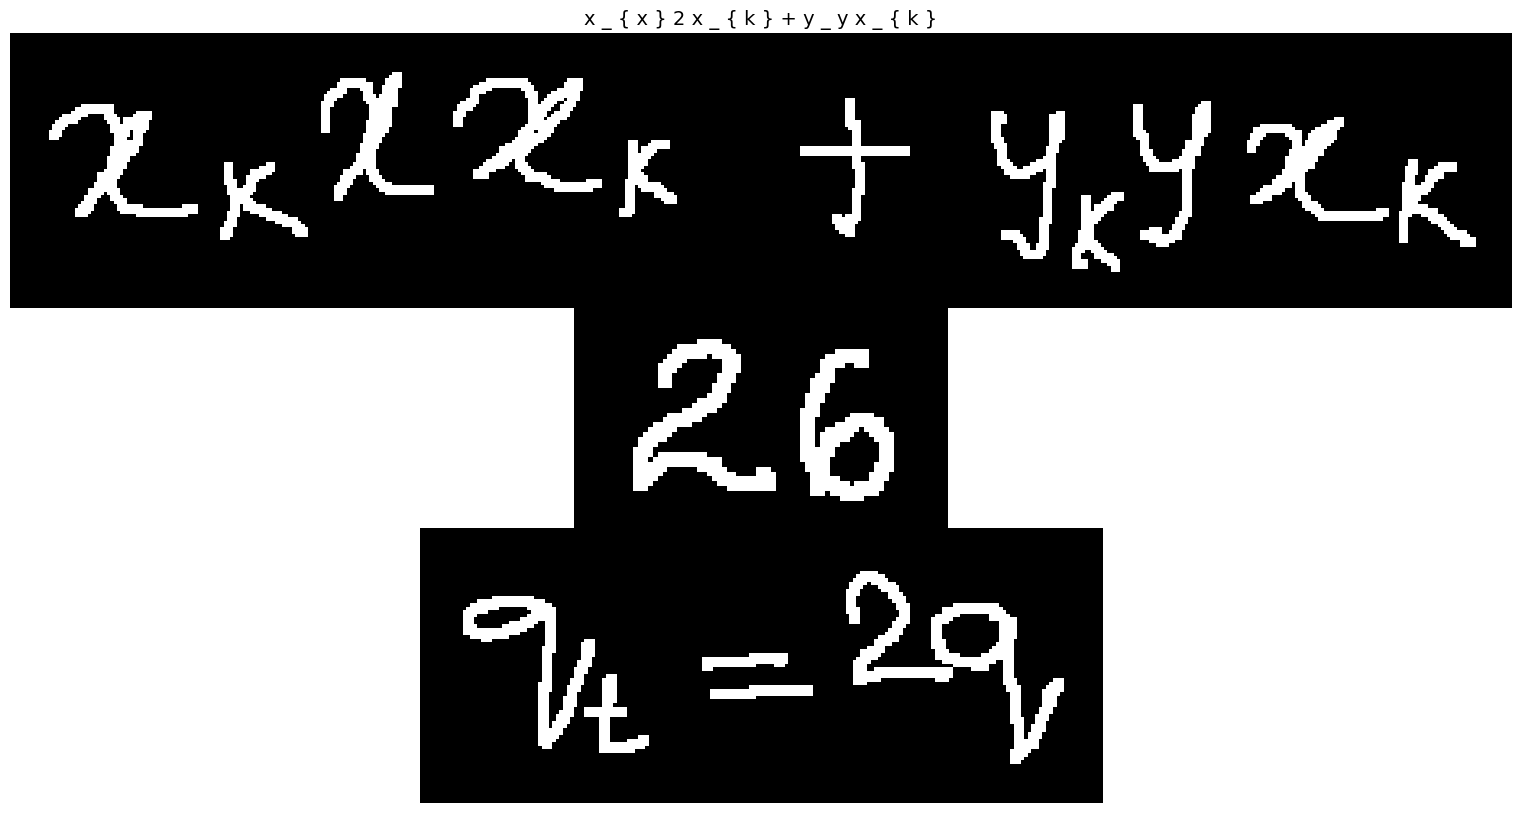

In [316]:
test = pd.read_csv('cnn_dataset/updated_2014.csv')

plt.figure(figsize=(20, 10))
for i in range(3):
    ax = plt.subplot(3, 1, i+1)
    img_dir = 'cnn_dataset/2014/'+valid.loc[i, 'image_name']
    img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    # image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = resize_image(img_dir)
    image = image/255.
    pred = model.predict(image.reshape(1, 128, 128, 1))
    decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                       greedy=True)[0][0])
    plt.title(vocab.indices2label(temp[i]), fontsize=14)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.8, hspace=-0.1)

image name :  18_em_18.bmp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
\theta _ { 3 } = \theta 1 + \theta _ { 2 }


(-0.5, 289.5, 80.5, -0.5)

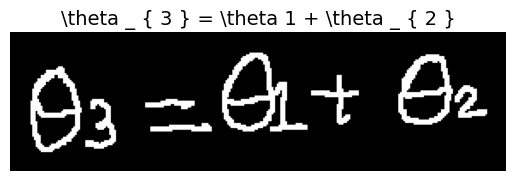

In [167]:
ind = 9
img_dir = 'cnn_dataset/2014/'+valid.loc[ind, 'image_name']
print("image name : ", valid.loc[ind, "image_name"])
img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
image = preprocess(img)
image = image/255.
pred = new_model.predict(image.reshape(1, 128, 128, 1))
decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                    greedy=False)[0][0])
plt.title(vocab.indices2label(temp[ind]), fontsize=14)
print(vocab.indices2label(temp[ind]))
plt.axis('off')

In [28]:
# from tensorflow.keras.models import load_model

# # Load the saved model
# new_model = load_model("bi-gru18.keras")
# print("Model loaded successfully!")


### Inverted Scanned Image

In [42]:
from PIL import Image, ImageOps

def invert_image_pillow(image_path, output_path):
    """
    Inverts the pixel values of an image using Pillow.

    Args:
        image_path (str): Path to the input image.
        output_path (str): Path to save the inverted image.
    """
    # Open the image
    img = Image.open(image_path).convert("RGB")
    
    # Invert the image
    inverted_img = ImageOps.invert(img)
    
    # Save the inverted image
    inverted_img.save(output_path)
    print(f"Inverted image saved to {output_path}")

# Example usage
image_path = "C:\\Users\\pc\\Downloads\\cnn_2_dataset\\cnn_2_dataset\\img_3.jpg"       # Path to your image
output_path = "C:\\Users\\pc\\Downloads\\cnn_2_dataset\\cnn_2_dataset\\inverted_img_3.jpg"  # Path to save the inverted image
invert_image_pillow(image_path, output_path)


Inverted image saved to C:\Users\pc\Downloads\cnn_2_dataset\cnn_2_dataset\inverted_img_3.jpg


In [30]:
import cv2
import numpy as np

# Path to the input image (photo captured from the camera)
input_path = 'img_4.jpg'
output_path = 'b_w_4.jpg'

# Read the image in color (BGR)
image = cv2.imread(input_path)

# Check if image is loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Option 1: Using simple thresholding (assuming the paper is very bright and text is dark)
# Here, THRESH_BINARY_INV will make dark regions (the text) white and bright regions (background) black.
_, binary_inverted = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
# The threshold value (200) might need tuning depending on the lighting conditions.

# Option 2: Alternatively, if lighting conditions are uneven, you can use adaptive thresholding.
# Uncomment the following lines to try adaptive thresholding instead:
# binary_inverted = cv2.adaptiveThreshold(
#     gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, 10
# )

# Save the processed image
cv2.imwrite(output_path, binary_inverted)

print(f"Processed image saved as {output_path}")

# Optionally, display the original and processed images
# cv2.imshow('Original Image', image)
# cv2.imshow('Processed Image', binary_inverted)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Processed image saved as b_w_4.jpg


In [70]:
import cv2
import numpy as np

# Path to your input image
input_path = 'img_8.jpg'
output_path = 'inverted_img_8.jpg'

# Load the image in grayscale (so we have a single channel)
img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

# Check if the image loaded successfully
if img is None:
    print("Error: Could not load image.")
    exit()

# Fetch the size (dimensions) of the image
height, width = img.shape
print(f"Image dimensions: {height} x {width}")

# Initialize a new image (array) filled with black pixels (0)
black_image = np.zeros((height, width), dtype=np.uint8)

# Define a threshold for "black" pixels in the original image.
# This threshold might need adjustment depending on your image.
# For example, any pixel value below 50 is considered part of the handwriting.
threshold = 120

# Create a mask where the original image is "black" (i.e., pixel value below threshold)
mask = img < threshold

# In the new image, set the pixels corresponding to the mask to white (255)
black_image[mask] = 255

# Save the processed image
cv2.imwrite(output_path, black_image)

# Optionally, display the images for verification
cv2.imshow('Original Image', img)
cv2.imshow('Processed Image', black_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Image dimensions: 428 x 1280


## Testing of Scanned Image 

In [69]:
from tensorflow.keras.models import load_model

# Load the saved model
new_model = load_model("../saved trained models/bi-gru18.keras")
print("Model loaded successfully!")

Model loaded successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
\sqrt { \frac { b ^ b } ^ { 2 } - ^ { } { a c ^ { b } } }


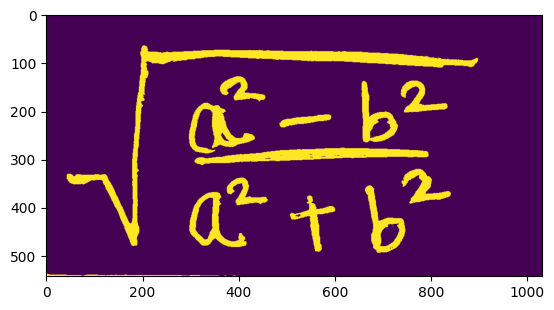

In [70]:
img_dir = "../test images/inverted_img_18.jpg"
img = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
image = resize_image(img_dir)
image = image/255.
pred = new_model.predict(image.reshape(1, 128, 128, 1))
decoded = K.get_value(K.ctc_decode(pred, input_length=np.ones(pred.shape[0])*pred.shape[1], 
                                    greedy=True)[0][0])
# plt.title(vocab.indices2label(temp[ind]), fontsize=14)
# print(vocab.indices2label(temp[ind]))
# plt.axis('off')
decoded_str = []
size = len(decoded[0])

for i in range(len(decoded[0])):
    if(decoded[0][i] == -1):
        break
    decoded_str.append(decoded[0][i])
 
print(vocab.indices2label(decoded_str))

128
\lim _ { x \rightarrow 0 } \sin \frac { \sin x } { x } = 1


### pix2tex

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   - -------------------------------------- 1.3/38.8 MB 6.7 MB/s eta 0:00:06
   ---- ----------------------------------- 4.2/38.8 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.2/38.8 MB 8.2 MB/s eta 0:00:05
   ---------- ----------------------------- 10.5/38.8 MB 12.6 MB/s eta 0:00:03
   ---------------- ----------------------- 15.7/38.8 MB 15.0 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/38.8 MB 14.1 MB/s eta 0:00:02
   ----------------------- ---------------- 22.8/38.8 MB 16.0 MB/s eta 0:00:01
   --------------------------- ------------ 27.0/38.8 MB 16.9 MB/s eta 0:00:01
   ------------------------------- -------- 30.4/38.8 MB 16.0 MB/s eta 0:00:01
   --------------------------------- ------ 32.5/38.8 MB 15.3 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/38.8 MB 14.9 MB/s 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Patel_Heet\\AppData\\Roaming\\Python\\Python312\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [342]:
from PIL import Image
from pix2tex.cli import LatexOCR

# Load the image
img = Image.open('C:\\Users\\Patel_Heet\\OneDrive - Dell Technologies\\Documents\\CNN-2\\test_images\\b_w_img_3.png') 

# Initialize the LaTeX OCR model
model = LatexOCR()

# Convert image to LaTeX
latex_code = model(img)

# Print the generated LaTeX code
print(latex_code)

ModuleNotFoundError: No module named 'pix2tex'

# Testing

In [ ]:
saved_model = model

In [123]:
import numpy as np
from tensorflow.keras import backend as K

preds = model.predict(train_x)

# Decode the predictions using CTC decode
decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0]) * preds.shape[1], greedy=True)[0][0])


221/221 ━━━━━━━━━━━━━━━━━━━━ 1239s 6s/step


In [37]:
preds = new_model.predict(train_x)

221/221 ━━━━━━━━━━━━━━━━━━━━ 1332s 6s/step


In [131]:
# decoded = K.get_value(K.ctc_decode(preds, input_length=np.ones(preds.shape[0]) * preds.shape[1], greedy=True)[0][0])
dummy = []

for i in decoded:
    dummy.append(i)
    
print(dummy[50])

[ 62  57 121   3 121   3 121   3 121   3 121   3 121  57   3  57   3 121
   3 121   3 121   3 121   3 121   3 121  57   3 121   3 121   3 121   3
 121   3 121   3 121   3 121   3  33  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1]


In [132]:
temp = []
temp2 = []
count = 0
for i in range(0, len(dummy)):
    for j in dummy[count]:
        if j == -1:
            break
        temp2.append(j)
    count = count+1
    temp.append(temp2)
    temp2 = []
    
print(temp[0])

[62, 57, 3, 121, 3, 121, 3, 121, 3, 121, 57, 121, 57, 3, 121, 57, 3, 121, 3, 121, 3, 121, 57, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 3, 12, 121]


In [133]:
print(" decoded[35] = ",decoded[35])
print(" temp[35] = ",temp[35])

 decoded[35] =  [ 96  57 121   3 121   3 121   3 121  57 121   3 121  57   3 121   3  57
 121   3 121  57   3 121   3 121   3 121   3 121   3 121   3 121   3 121
   5 121  33  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1
  -1  -1]
 temp[35] =  [96, 57, 121, 3, 121, 3, 121, 3, 121, 57, 121, 3, 121, 57, 3, 121, 3, 57, 121, 3, 121, 57, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 3, 121, 5, 121, 33]


In [134]:
prediction = []

for i in range(train_size):
    prediction.append(vocab.indices2label(temp[i]))

In [135]:
prediction[41]

'\\theta \\cdots q ( q \\cdots q ( q ( q ( q \\cdots q ( q ( q ( q ( q ( q ( q ( q ( q ( q ( q ( \\cdots q ( \\cdots q'

In [137]:
y_true = train.loc[0:train_size, "labels"]
print(" actual sequence = ",y_true[1])
print(" predicted sequence = ",prediction[1])

 actual sequence =  S = ( \sum _ { i = 1 } ^ { n } \theta _ { i } - ( n - 2 ) \pi ) r ^ { 2 }
 predicted sequence =  \cdots q \cdots ( \cdots ( \cdots q ( q ( q ( q \cdots q ( q \cdots ( q ( q ( q \cdots q \cdots q ( \cdots ( q ( q \cdots ( q ( q ( q ( q ( q ( q ( q ( q ( q
